##**DATA LOAD**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0_Summer_project/test.csv')

In [ ]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [ ]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# **전처리**

In [ ]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## **payload 결측치 관련 파생변수**

In [ ]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [ ]:
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값


train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [ ]:
test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화 (syn_flag_cat, port_dst_cat)

In [ ]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
# port_dst => 1~2023/이후 상위 5개/나머지
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [ ]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

In [ ]:
dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

In [ ]:
# PSH 유무: tcp_psh_count > 0 → 1, else → 0
train['has_psh_flag'] = (train['tcp_psh_count'] > 0).astype(int)
test['has_psh_flag'] = (test['tcp_psh_count'] > 0).astype(int)

# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

# 패킷 간 평균 시간 간격 이진 파생변수: iat_avg_packets <= 1 → 1, else → 0
train['is_iat_low'] = (train['iat_avg_packets'] <= 1.0).astype(int)
test['is_iat_low'] = (test['iat_avg_packets'] <= 1.0).astype(int)

# 포트 클러스터링 기반 파생변수 추가 (KMeans)
from sklearn.cluster import KMeans

port_dst_train = train_df[['port_dst']].fillna(-1)
port_dst_test = test_df[['port_dst']].fillna(-1)

kmeans = KMeans(n_clusters=6, random_state=156)
train['port_dst_cluster'] = kmeans.fit_predict(port_dst_train)
test['port_dst_cluster'] = kmeans.predict(port_dst_test)

# 비율 기반 파생변수 추가 (payload / (payload +duration))
train['payload_ratio'] = train['payload_bwd_mean'] / (train['payload_bwd_mean'] + train['duration'] + 1e-5)
test['payload_ratio'] = test['payload_bwd_mean'] / (test['payload_bwd_mean'] + test['duration'] + 1e-5)

# TCP 윈도우 비율 파생변수 추기
train['win_ratio'] = train['tcp_win_fwd_init'] / (train['tcp_win_bwd_init'] + 1e-5)
test['win_ratio'] = test['tcp_win_fwd_init'] / (test['tcp_win_bwd_init'] + 1e-5)

# 불필요한 기존변수 삭제
train.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)
test.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)

## 변수 삭제

In [ ]:
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [ ]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio',
    'payload_ratio',
    'win_ratio'
]

for col in log_cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = log_cols.copy()

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le_protocol = LabelEncoder()
le_postdst = LabelEncoder()
le_attack = LabelEncoder()

le_protocol.fit(pd.concat([train['protocol'], test['protocol']], axis=0).astype(str).unique())
le_postdst.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())

train['protocol'] = le_protocol.transform(train['protocol'].astype(str))
train['port_dst_cat'] = le_postdst.transform(train['port_dst_cat'].astype(str))
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

test['protocol'] = le_protocol.transform(test['protocol'].astype(str))
test['port_dst_cat'] = le_postdst.transform(test['port_dst_cat'].astype(str))

# 모델 선정 + 학습 및 예측

###**XGBoost + Optuna**

**Optuna + StratifiedKFold 적용**

In [ ]:
X = train.drop(['attack_type'], axis=1)
y = train['attack_type']

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.4 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# 튜닝 대상 데이터
X_tune = X
y_tune = y

# 평가지표
f1_macro = make_scorer(f1_score, average='macro')

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'random_state': 156,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'verbosity': 0
    }

    model = XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=156)
    scores = cross_val_score(model, X_tune, y_tune, scoring=f1_macro, cv=skf)

    return np.mean(scores)

# Optuna 튜닝
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=1800)

# 최적 파라미터 및 성능 확인
print("Best trial:")
print(f"  F1-macro: {study.best_value}")
print(f"  Params: {study.best_params}")

[I 2025-07-22 17:47:54,336] A new study created in memory with name: no-name-a7604e4b-c2c6-40f4-b77c-e123731ce1bd
[I 2025-07-22 17:48:42,997] Trial 0 finished with value: 0.782831123382574 and parameters: {'max_depth': 4, 'learning_rate': 0.18614843778981663, 'n_estimators': 434, 'subsample': 0.910394841500616, 'colsample_bytree': 0.6129493888508529, 'reg_alpha': 0.060476252028701105, 'reg_lambda': 1.176920780747931}. Best is trial 0 with value: 0.782831123382574.
[I 2025-07-22 17:49:09,777] Trial 1 finished with value: 0.7067299814281316 and parameters: {'max_depth': 9, 'learning_rate': 0.25068836688820295, 'n_estimators': 475, 'subsample': 0.6702895692078107, 'colsample_bytree': 0.6453437281912574, 'reg_alpha': 4.985766949774792, 'reg_lambda': 2.718460293284595}. Best is trial 0 with value: 0.782831123382574.
[I 2025-07-22 17:49:35,883] Trial 2 finished with value: 0.7349321635409585 and parameters: {'max_depth': 9, 'learning_rate': 0.24840196549105045, 'n_estimators': 374, 'subsampl

Best trial:
  F1-macro: 0.7941996765792193
  Params: {'max_depth': 9, 'learning_rate': 0.2194674119335795, 'n_estimators': 452, 'subsample': 0.978298559420077, 'colsample_bytree': 0.8348560506244289, 'reg_alpha': 0.2622686444270609, 'reg_lambda': 1.2832332980959433}


**튜닝 후 최종 모델 학습**

In [ ]:
# SMOTE 적용
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3, random_state=156)
X_train_over, y_train_over = smote.fit_resample(X, y)

# 최적 파라미터 기반 모델 학습
best_params = study.best_params
best_params.update({
    'random_state': 156,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'verbosity': 0
})

final_model = XGBClassifier(**best_params)
final_model.fit(X_train_over, y_train_over)

# 예측 및 평가
test_pred = final_model.predict(test)
print("Test set 예측 완료!")

Test set 예측 완료!


**데이콘 제출**

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'attack_type': test_pred
})

submission['attack_type'] = le_attack.inverse_transform(submission['attack_type'])


submission.to_csv('submission_xgb_Optuna.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_xgb_Optuna.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Importance 시각화**

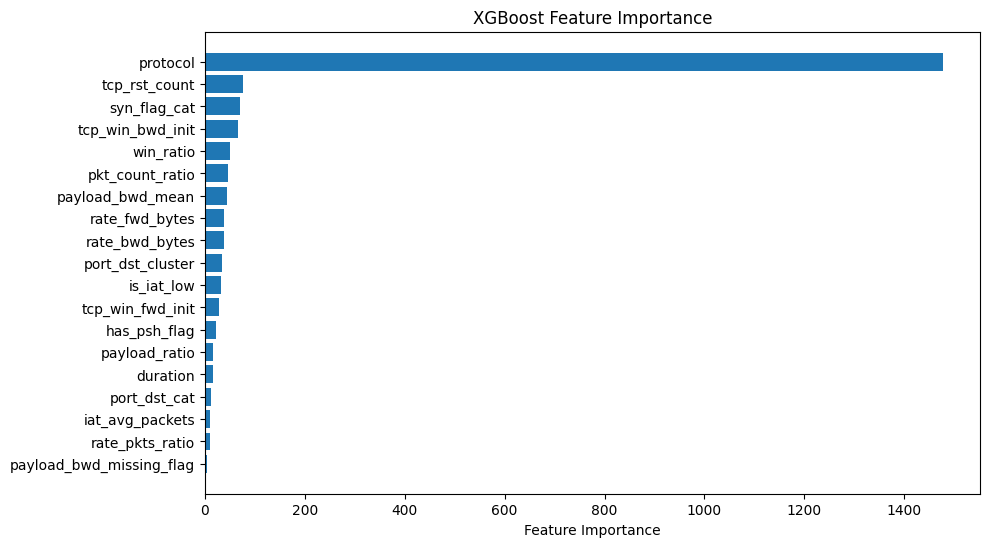

In [ ]:
importance = final_model.get_booster().get_score(importance_type='gain')
feature_names = list(importance.keys())
importances = list(importance.values())

sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = [importances[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()